In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [2]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [4]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


Some components that you may want to include:

    What is the distribution of conservation_status for animals?
    Are certain types of species more likely to be endangered?
    Are the differences between species and their conservation status significant?
    Which species were spotted the most at each park?


In [5]:
species['conservation_status'] = species['conservation_status'].fillna(False)

TypeError: '<=' not supported between instances of 'bool' and 'str'

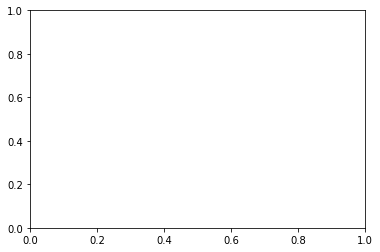

In [6]:
plt.hist(species['conservation_status']) = pd.to_numeric(species['conservation_status'], errors='coerce')